<a href="https://colab.research.google.com/github/rbhattar07/Python-Projects--Data-Analysis/blob/main/supermarket_sales_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riddhbhattar","key":"f7363c0fb7a444e5f636f321f1cf547c"}'}

In [4]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Mar  7 15:43 kaggle.json


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!pwd
!kaggle datasets list

/content
ref                                                              title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
mkoklu42/acoustic-extinguisher-fire-dataset                      Acoustic Extinguisher Fire Dataset                 620KB  2022-02-09 17:59:52            216  
mkoklu42/durum-wheat-dataset                                     Durum Wheat Dataset                                983MB  2022-02-18 09:34:17             53  
mkoklu42/grapevine-leaves-image-dataset                          Grapevine Leaves Image Dataset                     109MB  2022-02-09 18:21:40            173  
mkoklu42/rice-image-dataset                                      Rice Image Dataset                                 222MB  2022-02-07 14:32:24            230  
mkoklu42/pumpkin-seeds-dataset 

In [8]:
!kaggle datasets download -d aungpyaeap/supermarket-sales

  0% 0.00/35.9k [00:00<?, ?B/s]
100% 35.9k/35.9k [00:00<00:00, 48.4MB/s]


In [9]:
!unzip supermarket-sales.zip

Archive:  supermarket-sales.zip
  inflating: supermarket_sales - Sheet1.csv  


In [10]:
datafile = '/content/supermarket_sales - Sheet1.csv'

# Importing libraries and reading the CSV file
# Cleaning and preparing the data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [12]:
supermarket_df = pd.read_csv(datafile)

In [13]:
supermarket_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [14]:
supermarket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [15]:
supermarket_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [16]:
supermarket_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [17]:
# Finding any null values and rows
supermarket_df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [18]:
# finding any duplicated values
supermarket_df.duplicated().sum()

0

In [19]:
# Managing date and time columns
supermarket_df['month']= pd.DatetimeIndex(supermarket_df['Date']).month
supermarket_df['day']= pd.DatetimeIndex(supermarket_df['Date']).month
supermarket_df = supermarket_df.drop(columns = 'Date')

In [20]:
# supermarket_df is a consolidated sheet of all data
supermarket_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,3,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3,3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,13:22,Cash,31.84,4.761905,1.5920,7.7,2,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,15:33,Cash,65.82,4.761905,3.2910,4.1,2,2


In [21]:
#creating groups on the basis of city
yangon_df = supermarket_df[supermarket_df['City']== 'Yangon']
naypyitaw_df = supermarket_df[supermarket_df['City']== 'Naypyitaw']
mandalay_df = supermarket_df[supermarket_df['City']== 'Mandalay']

In [22]:
supermarket_df = supermarket_df[['City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Total','cogs', 'gross income', 'Rating', 'month']]
supermarket_df

,City,Customer type,Gender,Product line,Payment,Total,cogs,gross income,Rating,month
0,Yangon,Member,Female,Health and beauty,Ewallet,548.9715,522.83,26.1415,9.1,1
1,Naypyitaw,Normal,Female,Electronic accessories,Cash,80.2200,76.40,3.8200,9.6,3
2,Yangon,Normal,Male,Home and lifestyle,Credit card,340.5255,324.31,16.2155,7.4,3
3,Yangon,Member,Male,Health and beauty,Ewallet,489.0480,465.76,23.2880,8.4,1
4,Yangon,Normal,Male,Sports and travel,Ewallet,634.3785,604.17,30.2085,5.3,2
...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,Ewallet,42.3675,40.35,2.0175,6.2,1
996,Mandalay,Normal,Female,Home and lifestyle,Ewallet,1022.4900,973.80,48.6900,4.4,3
997,Yangon,Member,Male,Food and beverages,Cash,33.4320,31.84,1.5920,7.7,2
998,Yangon,Normal,Male,Home and lifestyle,Cash,69.1110,65.82,3.2910,4.1,2


In [23]:
yangon_df = yangon_df[['City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Total','cogs', 'gross income', 'Rating', 'month']]
naypyitaw_df = naypyitaw_df[['City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Total','cogs', 'gross income', 'Rating', 'month']]
mandalay_df = mandalay_df[['City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Total','cogs', 'gross income', 'Rating', 'month']]

# Data Analysis and Visualization
- Supermarket_df
- yangon_df
- naypyitaw_df
- mandalay_df

In [24]:
sns.set_style('whitegrid')

In [25]:
supermarket_df

,City,Customer type,Gender,Product line,Payment,Total,cogs,gross income,Rating,month
0,Yangon,Member,Female,Health and beauty,Ewallet,548.9715,522.83,26.1415,9.1,1
1,Naypyitaw,Normal,Female,Electronic accessories,Cash,80.2200,76.40,3.8200,9.6,3
2,Yangon,Normal,Male,Home and lifestyle,Credit card,340.5255,324.31,16.2155,7.4,3
3,Yangon,Member,Male,Health and beauty,Ewallet,489.0480,465.76,23.2880,8.4,1
4,Yangon,Normal,Male,Sports and travel,Ewallet,634.3785,604.17,30.2085,5.3,2
...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,Ewallet,42.3675,40.35,2.0175,6.2,1
996,Mandalay,Normal,Female,Home and lifestyle,Ewallet,1022.4900,973.80,48.6900,4.4,3
997,Yangon,Member,Male,Food and beverages,Cash,33.4320,31.84,1.5920,7.7,2
998,Yangon,Normal,Male,Home and lifestyle,Cash,69.1110,65.82,3.2910,4.1,2


In [26]:
supermarket_df_city_sales = supermarket_df.groupby('City', as_index = False)[['Total','cogs', 'gross income']].sum()
supermarket_df_city_sales

,City,Total,cogs,gross income
0,Mandalay,106197.6720,101140.64,5057.0320
1,Naypyitaw,110568.7065,105303.53,5265.1765
2,Yangon,106200.3705,101143.21,5057.1605


In [27]:
supermarket_df_member_sales = supermarket_df.groupby('Customer type', as_index = False)['Total','cogs', 'gross income'].sum()
supermarket_df_member_sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Customer type,Total,cogs,gross income
0,Member,164223.444,156403.28,7820.164
1,Normal,158743.305,151184.10,7559.205


In [28]:
supermarket_df_gender_sales = supermarket_df.groupby('Gender', as_index = False)['Total','cogs', 'gross income'].sum()
supermarket_df_gender_sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Gender,Total,cogs,gross income
0,Female,167882.925,159888.50,7994.425
1,Male,155083.824,147698.88,7384.944


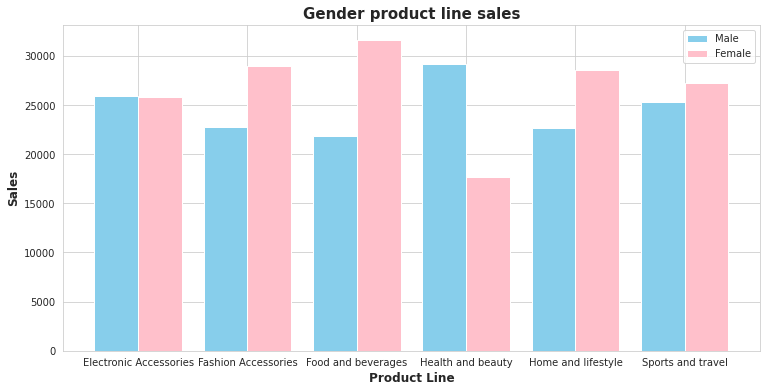

In [29]:
gender_product_cogs = supermarket_df.groupby(['Gender', 'Product line'], as_index= False)[['cogs']].sum()
gender_product_cogs_male = gender_product_cogs[gender_product_cogs['Gender'] == 'Male']
gender_product_cogs_female = gender_product_cogs[gender_product_cogs['Gender'] == 'Female']

plt.figure(figsize = (12.5,6));
plt.title('Gender product line sales', fontweight = 'bold', size = 15);
plt.xlabel('Product Line', fontweight = 'bold', size = 12);
plt.ylabel('Sales', fontweight = 'bold', size = 12);
x_axis = np.arange(len(gender_product_cogs_male['Product line']))
x = [0,1,2,3,4,5]
plt.bar(x = x_axis - 0.2, 
        height = gender_product_cogs_male['cogs'], 
        width = 0.4, 
        label = 'Male', 
        color = 'skyblue');
plt.bar(x = x_axis + 0.2, 
        height = gender_product_cogs_female['cogs'], 
        width = 0.4, 
        label = 'Female', 
        color = 'pink');
plt.xticks(x,
           labels = ['Electronic Accessories', 'Fashion Accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel'],

           wrap =True)
plt.legend(['Male', 'Female']);

In [30]:
gender_payment_type = supermarket_df.groupby(['Gender', 'Payment'], as_index = False)[['cogs', 'gross income']].sum()
gender_payment_type

,Gender,Payment,cogs,gross income
0,Female,Cash,56680.20,2834.010
1,Female,Credit card,50950.90,2547.545
2,Female,Ewallet,52257.40,2612.870
3,Male,Cash,50183.20,2509.160
4,Male,Credit card,45017.74,2250.887
5,Male,Ewallet,52497.94,2624.897


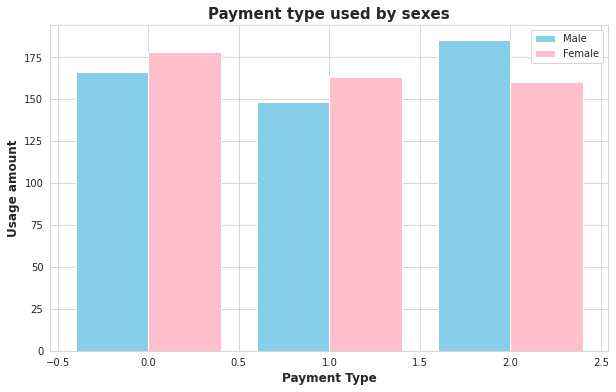

In [31]:
gender_payment_count = supermarket_df.groupby(['Gender', 'Payment'], as_index = False)[['cogs']].count()
gender_payment_count_male = gender_payment_count[gender_payment_count['Gender']== 'Male']
gender_payment_count_female = gender_payment_count[gender_payment_count['Gender']== 'Female']

plt.figure(figsize = (10,6));
plt.title('Payment type used by sexes', fontweight = 'bold', size = 15);
plt.xlabel('Payment Type', fontweight = 'bold', size = 12);
plt.ylabel('Usage amount', fontweight = 'bold', size = 12);
x_axis = np.arange(len(gender_payment_count_male.Payment))
y_axis = range(len(gender_payment_count.cogs))
plt.bar(x = x_axis - 0.2,
        height = gender_payment_count_male.cogs,
        width = 0.4, 
        color = "skyblue");
plt.bar(x = x_axis + 0.2,
        height = gender_payment_count_female.cogs,
        width = 0.4, 
        color = "pink");
plt.xticks = y_axis
plt.legend(['Male', 'Female']);

In [32]:
rating_productline = supermarket_df.groupby('Product line', as_index = False)[['Rating']].mean()
rating_productline = rating_productline.sort_values(by = 'Rating', ascending = False)
rating_productline

,Product line,Rating
2,Food and beverages,7.113218
1,Fashion accessories,7.029213
3,Health and beauty,7.003289
0,Electronic accessories,6.924706
5,Sports and travel,6.916265
4,Home and lifestyle,6.837500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


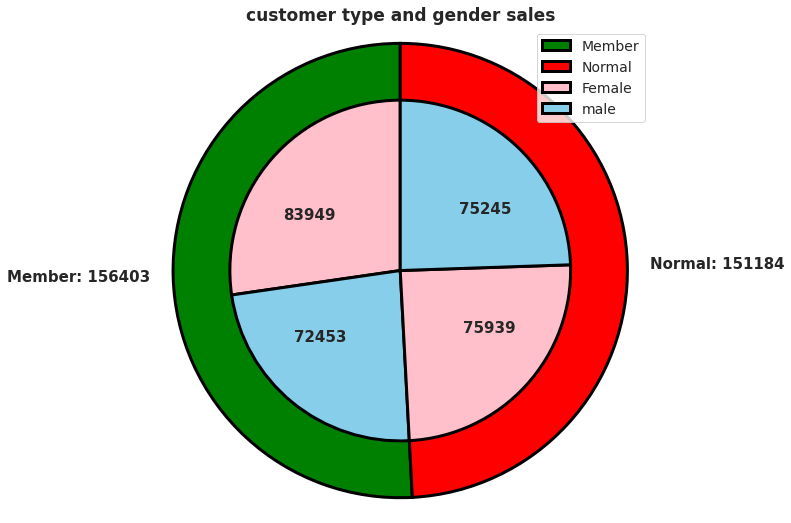

In [33]:
customer_type = supermarket_df.groupby('Customer type')[['cogs']].sum()
customer_type_gender = supermarket_df.groupby(['Customer type', 'Gender'])[['cogs']].sum()
plt.figure(figsize = (9,9));
plt.title('customer type and gender sales',
          fontweight = 'bold',
          size = 17);
colors1 = np.array(['green', 'red']);
label1 = ['Member: 156403', 'Normal: 151184']
x1 = customer_type
colors2 = ['pink', 'skyblue', 'pink', 'skyblue']
label2 = [83949, 72453, 75939, 75245]
label3 = ['Member', 'Normal', 'Female', "male"]
x2 = customer_type_gender
plt.pie(x1,
        colors = colors1,
        labels = label1,
        startangle = 90,
        labeldistance = 1.1,
        radius = 1.0,
        textprops = {'fontweight' : 'bold', 'size' : 15},
        wedgeprops = {'linewidth': 3, 'edgecolor' : 'black'});
plt.pie(x2,
        labels = label2,
        colors = colors2,
        startangle = 90,
         labeldistance = 0.5,
        radius = .75,
        textprops = {'fontweight' : 'bold', 'size' : 15},
        wedgeprops = {'linewidth': 3, 'edgecolor' : 'black'});
plt.legend(label3,
           fontsize = 14);
plt.axis('equal');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


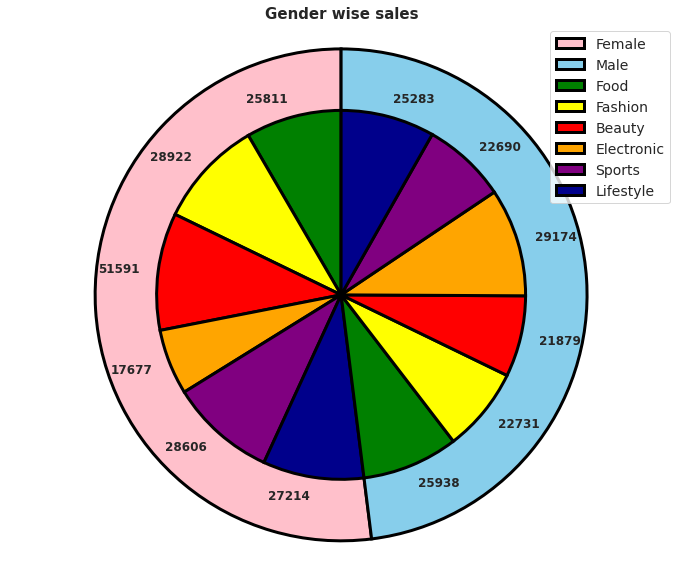

In [34]:
gender_sales = supermarket_df.groupby('Gender')['cogs'].sum() # Primary Pie chart
gender_sales_product = supermarket_df.groupby(['Gender','Product line'])[['cogs']].sum() # Secondary nested pie chart element
plt.figure(figsize = (12,10));
plt.title('Gender wise sales',
          fontweight = 'bold',
          size = 15);
colors1 = np.array(['pink','skyblue'])
labels1 = ['Female', 'Male']
x1 = gender_sales 
explode2 = [0,0,0,0,0,0,0,0,0,0,0,0,]
colors2 = np.array(['green', 'yellow', 'red', 'orange', 'purple', 'darkblue'])
labels2 = [25811, 28922, 51591, 17677, 28606, 27214, 25938, 22731, 21879, 29174, 22690, 25283]
label3 = ['Female', 'Male', 'Food', 'Fashion', 'Beauty', 'Electronic', 'Sports', 'Lifestyle']
x2 = gender_sales_product
plt.pie(x1,
        colors = colors1,
        startangle = 90,
        labeldistance = 1.5,
        radius = 1.0,
        textprops = {'fontweight' : 'bold', 'size' : 12},
        wedgeprops = {'linewidth': 3, 'edgecolor' : 'k'});
plt.pie(x2, 
        labels = labels2,
        colors = colors2,
        startangle = 90,
        labeldistance = 1.1,
        radius = .75,
        explode = explode2,
        textprops = {'fontweight' : 'bold', 'size' : 12},
        wedgeprops = {'linewidth': 3, 'edgecolor' : 'black'});
plt.legend(label3,
           fontsize = 14);
plt.axis('equal');

In [39]:
yangon_df_sales = yangon_df.groupby(['Gender', 'Customer type'], as_index = False)['cogs'].sum()
yangon_df_sales
# the gender sales in yangon is almost the same of both the sexes, so we won't be plotting it as there is no point in doing o.

,Gender,Customer type,cogs
0,Female,Member,25374.35
1,Female,Normal,25358.19
2,Male,Member,25708.96
3,Male,Normal,24701.71


In [43]:
naypyitaw_df_sales = naypyitaw_df.groupby(['Gender', 'Customer type'], as_index = False)['cogs'].sum()
naypyitaw_df_sales
# The gender sales is almost equal here but when it comes to the customer type section, Female customer type as member has a high sales when compared to the other customer type and the gender.

,Gender,Customer type,cogs
0,Female,Member,33003.28
1,Female,Normal,25744.78
2,Male,Member,21169.37
3,Male,Normal,25386.10


In [48]:
mandalay_df_sales = mandalay_df.groupby(['Gender', 'Customer type'])['cogs'].sum() 
mandalay_df_sales
# We wont be plotting this data cause the values are very close to each other so it wont make any sense in plotting the data.

Gender  Customer type
Female  Member           25571.84
        Normal           24836.06
Male    Member           25575.48
        Normal           25157.26
Name: cogs, dtype: float64